# Stock Prices Prediction Using Keras Long Term Short Memory# 


Datasetlinks: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [21]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
print(df)

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

In [23]:
df = df.dropna()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [24]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [25]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034],
           dtype='int64', length=2035)

In [26]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034],
           dtype='int64', length=2035)

In [27]:
df.size

16280

In [28]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [29]:
df.info

<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                

In [30]:
df.describe

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4              

In [31]:
df_close = df['Close']
df_close.shape

(2035,)

In [32]:
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [33]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

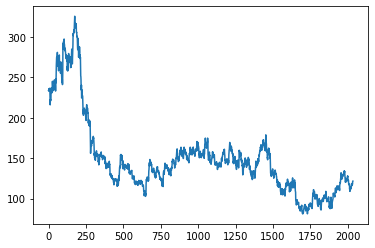

In [34]:
plt.plot(df_close)

In [35]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 12s 209ms/step - loss: 0.0249 - val_loss: 0.0077
Epoch 2/100
23/23 [==============================] - 3s 149ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 3s 142ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/100
23/23 [==============================] - 4s 155ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/100
23/23 [==============================] - 4s 157ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 6/100
23/23 [==============================] - 3s 150ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/100
23/23 [==============================] - 3s 149ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 4s 159ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/100
23/23 [==============================] - 3s 149ms/step - loss: 0.0012 - val_loss: 9.9195e-04
Epoch 10/100
23/23 [==============================] - 4s 168ms/step - loss: 0.0010 - v

23/23 [==============================] - 4s 160ms/step - loss: 2.3773e-04 - val_loss: 2.2023e-04
Epoch 77/100
23/23 [==============================] - 4s 154ms/step - loss: 2.4476e-04 - val_loss: 2.6283e-04
Epoch 78/100
23/23 [==============================] - 4s 158ms/step - loss: 2.2858e-04 - val_loss: 2.3104e-04
Epoch 79/100
23/23 [==============================] - 4s 160ms/step - loss: 2.2286e-04 - val_loss: 2.2973e-04
Epoch 80/100
23/23 [==============================] - 3s 142ms/step - loss: 2.3613e-04 - val_loss: 2.4592e-04
Epoch 81/100
23/23 [==============================] - 4s 159ms/step - loss: 2.2525e-04 - val_loss: 3.2454e-04
Epoch 82/100
23/23 [==============================] - 4s 178ms/step - loss: 2.8907e-04 - val_loss: 2.1091e-04
Epoch 83/100
23/23 [==============================] - 4s 175ms/step - loss: 2.3207e-04 - val_loss: 1.9271e-04
Epoch 84/100
23/23 [==============================] - 3s 150ms/step - loss: 2.3740e-04 - val_loss: 2.2672e-04
Epoch 85/100
23/23 [===

In [39]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

163.25996364726367

In [40]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

105.37098609947965

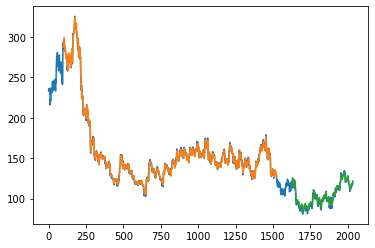

In [41]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [43]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [45]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=300
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>300):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.02246732 0.03125    0.02348856 0.0249183  0.02144608 0.04840686
 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667
 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049
 0.04799837 0.05147059 0.05065359 0.03431373 0.04575163 0.04187092
 0.04554739 0.03941993 0.02716503 0.03125    0.05882353 0.07148693
 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392 0.10375817
 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516 0.11049837
 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549  0.08169935
 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882 0.07945261
 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353 0.09558824
 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314 0.0443219
 0.03941993 0.0379902  0.04656863 0.05085784 0.07209967 0.06535948
 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399 0.07046569
 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049  0.02634804
 0.02410131 0.02961601 0.01960784 0.02961601 0.04575

2 day output [[0.16515347]]
3 day input [0.0249183  0.02144608 0.04840686 0.04575163 0.03962418 0.03921569
 0.04758987 0.04513889 0.04166667 0.04125817 0.05044935 0.05555556
 0.05494281 0.05412582 0.0435049  0.04799837 0.05147059 0.05065359
 0.03431373 0.04575163 0.04187092 0.04554739 0.03941993 0.02716503
 0.03125    0.05882353 0.07148693 0.08721405 0.08986928 0.10498366
 0.08905229 0.10355392 0.10375817 0.12275327 0.10906863 0.09660948
 0.1064134  0.10457516 0.11049837 0.1127451  0.09803922 0.09987745
 0.08925654 0.0747549  0.08169935 0.08925654 0.09068627 0.08129085
 0.08823529 0.08455882 0.07945261 0.08374183 0.07781863 0.09824346
 0.09089052 0.09007353 0.09558824 0.06862745 0.06372549 0.0494281
 0.04799837 0.04534314 0.0443219  0.03941993 0.0379902  0.04656863
 0.05085784 0.07209967 0.06535948 0.07230392 0.07802288 0.07741013
 0.06086601 0.06413399 0.07046569 0.05412582 0.0498366  0.05167484
 0.05330882 0.0435049  0.02634804 0.02410131 0.02961601 0.01960784
 0.02961601 0.04575163 

6 day output [[0.1636265]]
7 day input [0.03962418 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817
 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049  0.04799837
 0.05147059 0.05065359 0.03431373 0.04575163 0.04187092 0.04554739
 0.03941993 0.02716503 0.03125    0.05882353 0.07148693 0.08721405
 0.08986928 0.10498366 0.08905229 0.10355392 0.10375817 0.12275327
 0.10906863 0.09660948 0.1064134  0.10457516 0.11049837 0.1127451
 0.09803922 0.09987745 0.08925654 0.0747549  0.08169935 0.08925654
 0.09068627 0.08129085 0.08823529 0.08455882 0.07945261 0.08374183
 0.07781863 0.09824346 0.09089052 0.09007353 0.09558824 0.06862745
 0.06372549 0.0494281  0.04799837 0.04534314 0.0443219  0.03941993
 0.0379902  0.04656863 0.05085784 0.07209967 0.06535948 0.07230392
 0.07802288 0.07741013 0.06086601 0.06413399 0.07046569 0.05412582
 0.0498366  0.05167484 0.05330882 0.0435049  0.02634804 0.02410131
 0.02961601 0.01960784 0.02961601 0.04575163 0.05923203 0.06678922
 0.06229575 0.06311275 0

10 day output [[0.16251051]]
11 day input [0.04166667 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582
 0.0435049  0.04799837 0.05147059 0.05065359 0.03431373 0.04575163
 0.04187092 0.04554739 0.03941993 0.02716503 0.03125    0.05882353
 0.07148693 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392
 0.10375817 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516
 0.11049837 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549
 0.08169935 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882
 0.07945261 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353
 0.09558824 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314
 0.0443219  0.03941993 0.0379902  0.04656863 0.05085784 0.07209967
 0.06535948 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399
 0.07046569 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049
 0.02634804 0.02410131 0.02961601 0.01960784 0.02961601 0.04575163
 0.05923203 0.06678922 0.06229575 0.06311275 0.0629085  0.06658497
 0.07434641 0.06944444

14 day output [[0.16208461]]
15 day input [0.05494281 0.05412582 0.0435049  0.04799837 0.05147059 0.05065359
 0.03431373 0.04575163 0.04187092 0.04554739 0.03941993 0.02716503
 0.03125    0.05882353 0.07148693 0.08721405 0.08986928 0.10498366
 0.08905229 0.10355392 0.10375817 0.12275327 0.10906863 0.09660948
 0.1064134  0.10457516 0.11049837 0.1127451  0.09803922 0.09987745
 0.08925654 0.0747549  0.08169935 0.08925654 0.09068627 0.08129085
 0.08823529 0.08455882 0.07945261 0.08374183 0.07781863 0.09824346
 0.09089052 0.09007353 0.09558824 0.06862745 0.06372549 0.0494281
 0.04799837 0.04534314 0.0443219  0.03941993 0.0379902  0.04656863
 0.05085784 0.07209967 0.06535948 0.07230392 0.07802288 0.07741013
 0.06086601 0.06413399 0.07046569 0.05412582 0.0498366  0.05167484
 0.05330882 0.0435049  0.02634804 0.02410131 0.02961601 0.01960784
 0.02961601 0.04575163 0.05923203 0.06678922 0.06229575 0.06311275
 0.0629085  0.06658497 0.07434641 0.06944444 0.08088235 0.07700163
 0.0684232  0.0678104

 0.16215059 0.16208461 0.16203587 0.16200052 0.16197586 0.16196005]
19 day output [[0.16195183]]
20 day input [0.05065359 0.03431373 0.04575163 0.04187092 0.04554739 0.03941993
 0.02716503 0.03125    0.05882353 0.07148693 0.08721405 0.08986928
 0.10498366 0.08905229 0.10355392 0.10375817 0.12275327 0.10906863
 0.09660948 0.1064134  0.10457516 0.11049837 0.1127451  0.09803922
 0.09987745 0.08925654 0.0747549  0.08169935 0.08925654 0.09068627
 0.08129085 0.08823529 0.08455882 0.07945261 0.08374183 0.07781863
 0.09824346 0.09089052 0.09007353 0.09558824 0.06862745 0.06372549
 0.0494281  0.04799837 0.04534314 0.0443219  0.03941993 0.0379902
 0.04656863 0.05085784 0.07209967 0.06535948 0.07230392 0.07802288
 0.07741013 0.06086601 0.06413399 0.07046569 0.05412582 0.0498366
 0.05167484 0.05330882 0.0435049  0.02634804 0.02410131 0.02961601
 0.01960784 0.02961601 0.04575163 0.05923203 0.06678922 0.06229575
 0.06311275 0.0629085  0.06658497 0.07434641 0.06944444 0.08088235
 0.07700163 0.0684232

 0.16197586 0.16196005 0.16195183 0.16195032 0.16195476 0.16196457]
23 day output [[0.16197908]]
24 day input [0.04554739 0.03941993 0.02716503 0.03125    0.05882353 0.07148693
 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392 0.10375817
 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516 0.11049837
 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549  0.08169935
 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882 0.07945261
 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353 0.09558824
 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314 0.0443219
 0.03941993 0.0379902  0.04656863 0.05085784 0.07209967 0.06535948
 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399 0.07046569
 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049  0.02634804
 0.02410131 0.02961601 0.01960784 0.02961601 0.04575163 0.05923203
 0.06678922 0.06229575 0.06311275 0.0629085  0.06658497 0.07434641
 0.06944444 0.08088235 0.07700163 0.0684232  0.06781046 0.0629085
 0.0692402  0.0755719

26 day output [[0.16204417]]
27 day input [0.03125    0.05882353 0.07148693 0.08721405 0.08986928 0.10498366
 0.08905229 0.10355392 0.10375817 0.12275327 0.10906863 0.09660948
 0.1064134  0.10457516 0.11049837 0.1127451  0.09803922 0.09987745
 0.08925654 0.0747549  0.08169935 0.08925654 0.09068627 0.08129085
 0.08823529 0.08455882 0.07945261 0.08374183 0.07781863 0.09824346
 0.09089052 0.09007353 0.09558824 0.06862745 0.06372549 0.0494281
 0.04799837 0.04534314 0.0443219  0.03941993 0.0379902  0.04656863
 0.05085784 0.07209967 0.06535948 0.07230392 0.07802288 0.07741013
 0.06086601 0.06413399 0.07046569 0.05412582 0.0498366  0.05167484
 0.05330882 0.0435049  0.02634804 0.02410131 0.02961601 0.01960784
 0.02961601 0.04575163 0.05923203 0.06678922 0.06229575 0.06311275
 0.0629085  0.06658497 0.07434641 0.06944444 0.08088235 0.07700163
 0.0684232  0.06781046 0.0629085  0.0692402  0.0755719  0.07781863
 0.08088235 0.08843954 0.09395425 0.09599673 0.08660131 0.09027778
 0.08517157 0.0837418

In [46]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

df3 = df_close.tolist()
df3.extend(lst_output)

len(df_close)

2035

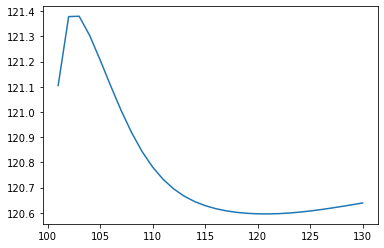

In [47]:
# plt.plot(day_new, scaler.inverse_transform(df_close()))
plt.plot(day_pred, scaler.inverse_transform(lst_output))